# Predicting UFO Sightings in the United States 
#### by Ari Gozenput and Nick Ponturo

## Introduction

<p> There's a lot of people in the United States that would be quick to dismiss the thought of extra-terrestrials visitng our planet, but yet, there are 80,000 reports of UFO sightings from the past century. We're going to be analyzing a data set found on Kaggle, which gives provides us with the following: <br>
  <ul>
  <li>The Country of the Sighting</li>
  <li>The State of the Sighting</li>
  <li>The City of the Sighting</li>
  <li>The Date of the sighting</li>
  <li>The Duration of the Sighting</li>
  <li>The longitude and latitude of the sighting</li>
  <li>The Description of the Sighting</li>
  </ul> </p>
  
  <p> We're going to analyze the trends of the sightings, visualize them in a way that makes them easy to understand, and try to predict the sightings through Machine Learning. <br></p>
  #### End Goal: 
  Lets try to find the best place to see a UFO, and predict it with ML.
   
## Required Tools and Libraries
We are going to need Python 3.5 and these libraries:
<ul>
  <li>pandas</li>
  <li>regular expressions</li>
  <li>numpy</li>
  <li>matplotlib</li>
  <li>scikit-learn</li>
  <li>seaborn</li>
  <li>folium (needs to be installed through '!pip install folium') </li>
    </ul>
We will import all of these libraries now:

In [1]:
#!pip install folium
#!/usr/bin/env python -W ignore::DeprecationWarning

# Data Manipulation Tools
import pandas as pd
import re
import numpy as np

# Linear Regression Tools
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sb
import folium
from folium import plugins

# Misc 
import warnings
warnings.filterwarnings('ignore')


## Getting Started

Before we can start analyzing the data, we have to get it. The CSV database can be found at https://www.kaggle.com/NUFORC/ufo-sightings. Once we have the CSV file, we need to convert to a pandas dataframe. This lets us have more control over the data structure.

In order for the dataframe to work possible structural inaccuracies in the CSV, we include the following arguments into the read_csv function: 'error_bad_lines=False, na_values=['.']'

We will do that now. 


In [2]:
# Reading CSV and converting it into dataframe
data = pd.read_csv('UFO_sightings.csv', error_bad_lines=False, na_values=['.'])

b'Skipping line 865: expected 11 fields, saw 12\nSkipping line 866: expected 11 fields, saw 12\nSkipping line 867: expected 11 fields, saw 12\nSkipping line 868: expected 11 fields, saw 12\nSkipping line 869: expected 11 fields, saw 12\nSkipping line 870: expected 11 fields, saw 12\nSkipping line 871: expected 11 fields, saw 12\nSkipping line 872: expected 11 fields, saw 12\nSkipping line 873: expected 11 fields, saw 12\nSkipping line 874: expected 11 fields, saw 12\nSkipping line 875: expected 11 fields, saw 12\nSkipping line 876: expected 11 fields, saw 12\nSkipping line 877: expected 11 fields, saw 12\nSkipping line 878: expected 11 fields, saw 12\nSkipping line 879: expected 11 fields, saw 12\nSkipping line 880: expected 11 fields, saw 12\nSkipping line 1713: expected 11 fields, saw 12\nSkipping line 1714: expected 11 fields, saw 12\nSkipping line 1715: expected 11 fields, saw 12\nSkipping line 1716: expected 11 fields, saw 12\nSkipping line 1717: expected 11 fields, saw 12\nSkippi

## Checking Out Our Data

In [43]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/49 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/04,29.8830556,-97.941111
1,10/10/49 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/05,29.38421,-98.581082
2,10/10/55 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/08,53.2,-2.916667
3,10/10/56 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/04,28.9783333,-96.645833
4,10/10/60 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,21.4180556,-157.803611


## Tidying Our Data

After looking at our data, we see that most of the entries are in the United States. Therefore, lets focus on analyzing only the data from the US.

In [42]:
# Taking only data from United States
us_df = data[data.country == 'us']
us_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/49 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/04,29.8830556,-97.941111
3,10/10/56 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/04,28.9783333,-96.645833
4,10/10/60 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/04,21.4180556,-157.803611
5,10/10/61 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/07,36.595,-82.188889
7,10/10/65 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/99,41.1175,-73.408333


Now, looking at the dates, the years seem to be in a format that could use some work. We're going add the full year instead of just the last two digits. We're also going to remove the data from years earlier than 1949.

In [44]:
# Properly Formatting the dates
unformatted_dates = us_df.datetime 
dates = [] 

for x in unformatted_dates:
    str1 = re.match('(\d*)/(\d*)/(\d*)\s?(\d*):(\d*)', x)
    if str1 is not None:
        y = int(str1.group(3))
        if y < 25:
            y = 2000 + y
        else:
            y = 1900 + y
        dates.append(y)
    else: 
        dates.append(-1)

# Dropping all dates that were before 1949
us_df['year'] = dates
us_df = us_df[us_df.year>0]
us_df = us_df[us_df['year'] > 1949]
del us_df['datetime']

Last two parts for tidying data. We're not using some of these columns - so we're going to remove them. Also, in foresight, the column named shape will give us issues. This is because .shape is a python method.

In [45]:
del us_df['duration (seconds)']
del us_df['date posted']
del us_df['country']

#shape column had to be renamed because .shape method 
us_df = us_df.rename(index=str, columns={"shape": "shapes"})
us_df = us_df.rename(index=str, columns={"shape": "shapes"})
us_df2 = us_df.rename(index=str, columns={"shape": "shapes"})

us_df.head()

,city,state,shapes,duration (hours/min),comments,latitude,longitude,year
3,edna,tx,circle,1/2 hour,My older brother and twin sister were leaving ...,28.9783333,-96.645833,1956
4,kaneohe,hi,light,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,1960
5,bristol,tn,sphere,5 minutes,My father is now 89 my brother 52 the girl wit...,36.595,-82.188889,1961
7,norwalk,ct,disk,20 minutes,A bright orange color changing to reddish colo...,41.1175,-73.408333,1965
8,pell city,al,disk,3 minutes,Strobe Lighted disk shape object observed clos...,33.5861111,-86.286111,1966


### Splitting our data into time periods
We don't really know much about the data right now, so we're going to split up the data into 6 different time periods and see if we can find any general trends. You can use any method you want to split up the data, including bins, but we found this to be a simple solution.

In [7]:
# Splitting up the data into 6 different time periods

#1950 - 1960
start_1950 = us_df[us_df.year >= 1950]
start_1950 = start_1950[start_1950.year < 1960]

#1960 - 1970
start_1960 = us_df[us_df.year >= 1960]
start_1960 = start_1960[start_1960.year < 1970]

#1970 - 1980
start_1970 = us_df[us_df.year >= 1970]
start_1970 = start_1970[start_1970.year < 1980]

#1980 - 1990
start_1980 = us_df[us_df.year >= 1980]
start_1980 = start_1980[start_1980.year < 1990]

#1990 - 2000
start_1990 = us_df[us_df.year >= 1990]
start_1990 = start_1990[start_1990.year < 2000]

#2000 - 2010
start_2000 = us_df[us_df.year >= 2000]
start_2000 = start_2000[start_2000.year < 2010]


## Visualizing The Data
Now that we have six separate data frames, we can easily see the amount of sightings from each decade. Lets graph this and look for trends.

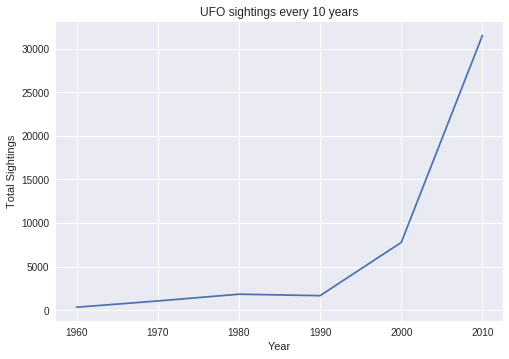

In [8]:
#total sightings every ten years
total_sightings = [start_1950.shape[0], start_1960.shape[0], start_1970.shape[0], start_1980.shape[0], \
                   start_1990.shape[0],start_2000.shape[0]]
year_list = [1960,1970,1980,1990,2000,2010]

plt.plot(year_list, total_sightings)
plt.ylabel('Total Sightings')
plt.xlabel('Year')
plt.title('UFO sightings every 10 years')
plt.show()


### A Closer Look
Wow, we can tell that the amount of sightings in the United States skyrockets right after the year 1990. Lets get a closer look and just graph the sightings that happened between 1990 and 2010

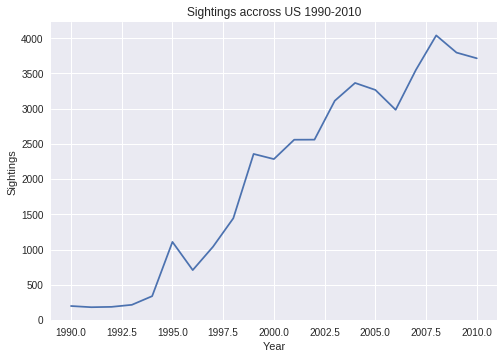

In [9]:
#graph total sightings from 1990 -2010
spike = us_df[us_df.year >= 1990]
spike = spike[spike.year <= 2010]
spike = spike.groupby('year').size().reset_index(name="total_sightings")
plt.plot(spike['year'], spike['total_sightings'])
plt.ylabel('Sightings')
plt.xlabel('Year')
plt.title('Sightings accross US 1990-2010')
plt.show()

Looks like the spike happened right around 1993! Before asking the reason of this spike, lets learn more about the data trends.

<b>Was the spike localized to certain states or generalized to all of the US?</b> We're going to do this by gathering the sightings per each state.

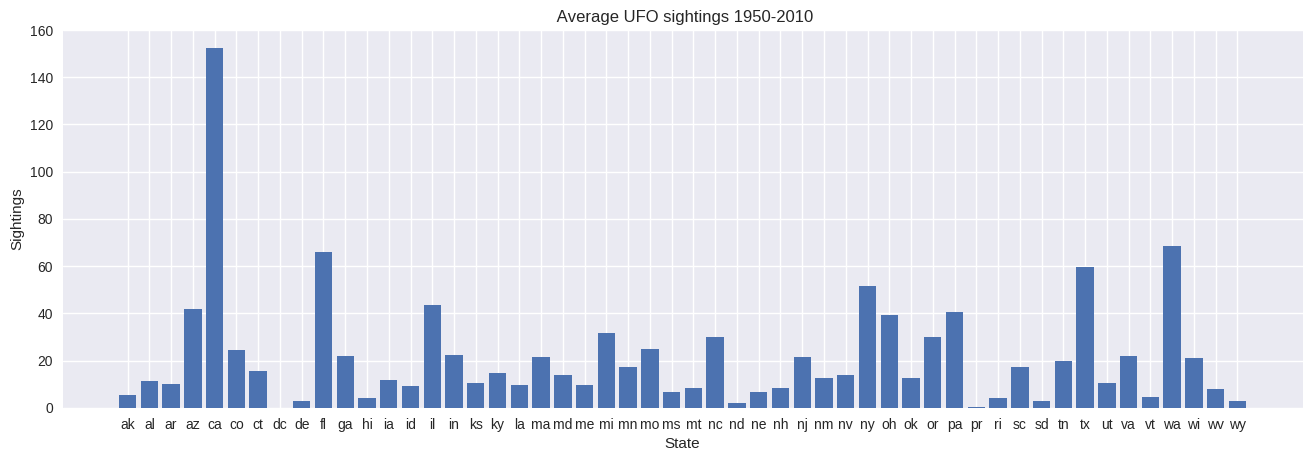

In [10]:
#average sightings by state
by_state_df = us_df.groupby('state')
averages = []
x_axis = []

#creates the array for the x_axis to represent states
for x in range (0, 52):
    averages.append(by_state_df.size()[x]/60)
    x_axis.append(x+1)
states = by_state_df.size().axes

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.bar(x_axis, averages)
plt.ylabel('Sightings')
plt.xlabel('State')
plt.title(' Average UFO sightings 1950-2010')
plt.xticks(x_axis, states[0])
plt.show()

Looks like not all of the states saw in equal amount of sightings from 1950-2010. We know that the spike happened from 1990 - 2010, so lets look at the state distribution of sightings just from that period.

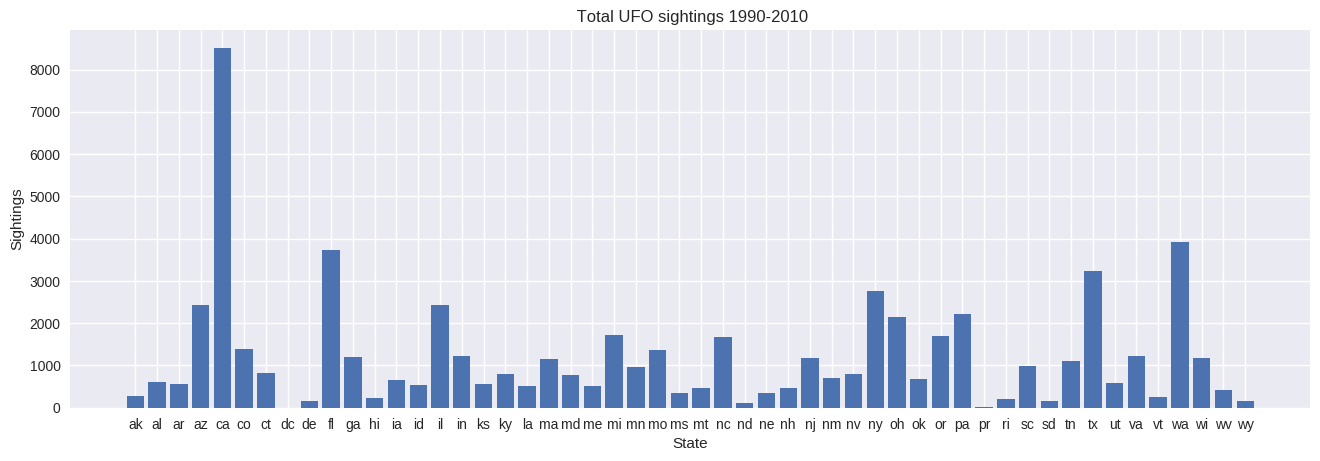

In [11]:
#total sightings by state 1990 - 2010
#drop all years before 1990
state_spike = us_df[us_df.year > 1990]
state_spike = state_spike.groupby('state').size().reset_index(name="total_sightings")
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.bar(x_axis, state_spike['total_sightings'])
plt.ylabel('Sightings')
plt.xlabel('State')
plt.title(' Total UFO sightings 1990-2010')
plt.xticks(x_axis, state_spike['state'])
plt.show()



Looks like the same states that had the most sightings in the past century had the most sightings during the spike. 

After looking at the average amounnt of sightings and the total sightings per year it has become clear that there are extremes in both graphs.  For instance, California has over 8,000 total sightings from 1990-2010 while Rhode Island has less than 1000 and DC has none.  There could be many different reasons for this differnce including size and population.  For now lets take a look at the standard deviations from 1950-2010 to see just how dispersed the dispersed the total sightings per tate are.  

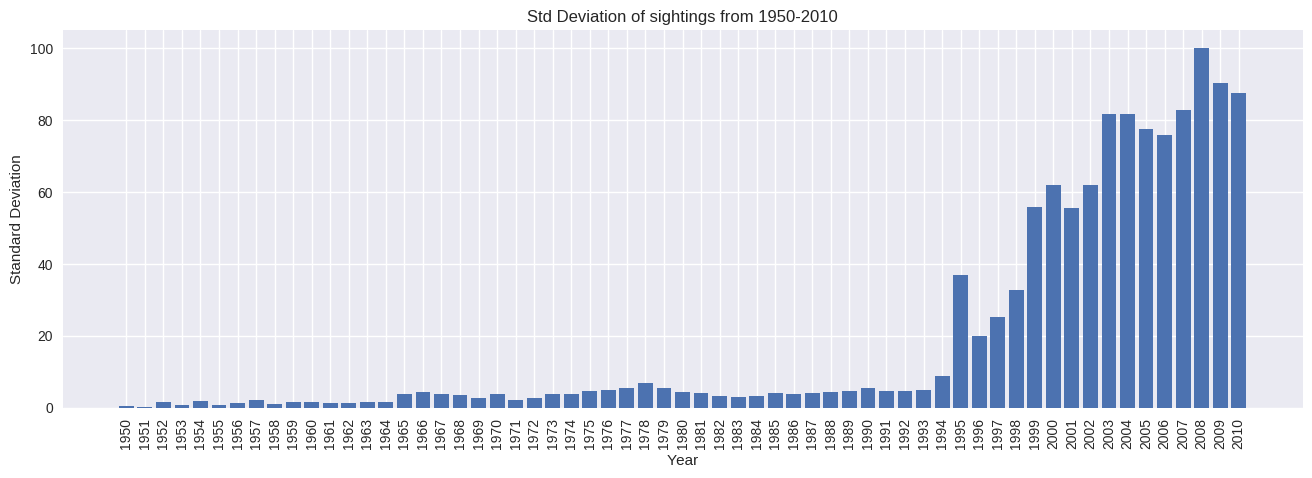

In [12]:
standard = []
sd = []
#find standard deviation for every year
for i in range(0, 61):
    standard.append([])
    temp_df = us_df.loc[us_df['year'] == (1950+i)].groupby('state').size().reset_index(name="count")
    standard[i].append(temp_df['count'])
    sd.append(np.std(standard[i]))  
    temp_df = []

#make each year an x_tick
years = []
for i in range(1, 62):
    years.append(1949 + i)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.bar(years, sd)
plt.xticks(years,rotation='vertical')
plt.ylabel('Standard Deviation')
plt.xlabel('Year')
plt.title('Std Deviation of sightings from 1950-2010')
plt.show()

The standard deviations don't really increase until right after 1993, so lets investigate the standard deviations from 1990-2010 further, and this time, lets look at it from a state by state basis from the year 2008 (that year had the highest standard deviation).

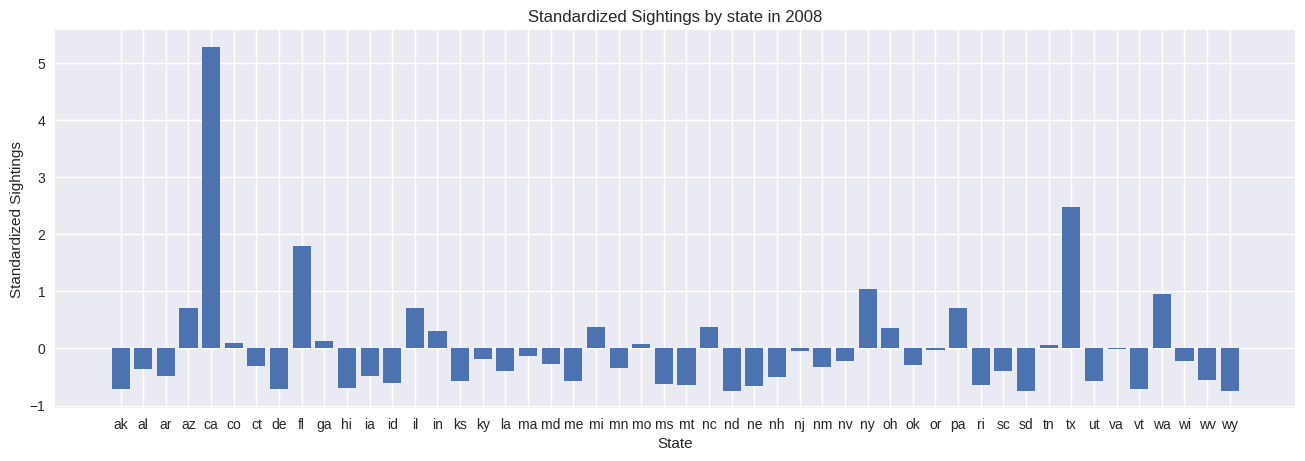

In [21]:
#standardizing sightings in the year 2008
#already calculared sd for 2008
sd_2008 = sd[58]

#calculating the total amount of sightings in each state in 2008
sd_df_2008 = us_df.loc[us_df['year'] == (2008)].groupby('state').size().reset_index(name="count")

#getting the avg for 2008
total = (sd_df_2008['count'].sum())/50
sd_sightings = []
x_tick = []

#calculating standard sightings by state
for index, row in sd_df_2008.iterrows():
    sd_sightings.append((row['count'] - total)/sd_2008)
sd_df_2008['std_sightings'] = sd_sightings

#creating x_ticks for each year
for i in range (0, 50):
    x_tick.append(i+1)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.bar(x_tick, sd_df_2008['std_sightings'])
plt.xticks(x_tick, sd_df_2008['state'])
plt.ylabel('Standardized Sightings')
plt.xlabel('State')
plt.title('Standardized Sightings by state in 2008')
plt.show()



### Choosing the Best States
The graph above makes it very easy for us to tell which states were the highest and lowest extremes in the year 2008.  Since we are hoping to find a UFO, we should explore the data we can find pertaining to the highest extreme states.  Therefore, we will analyze, Arizona, Washington, Florida, Texas, and California further. <br>
<br>
Lets take a look at the total number of sightings in these five states from 1950-2010.  We will do this by creating a line graph with each line representing one of the five states.


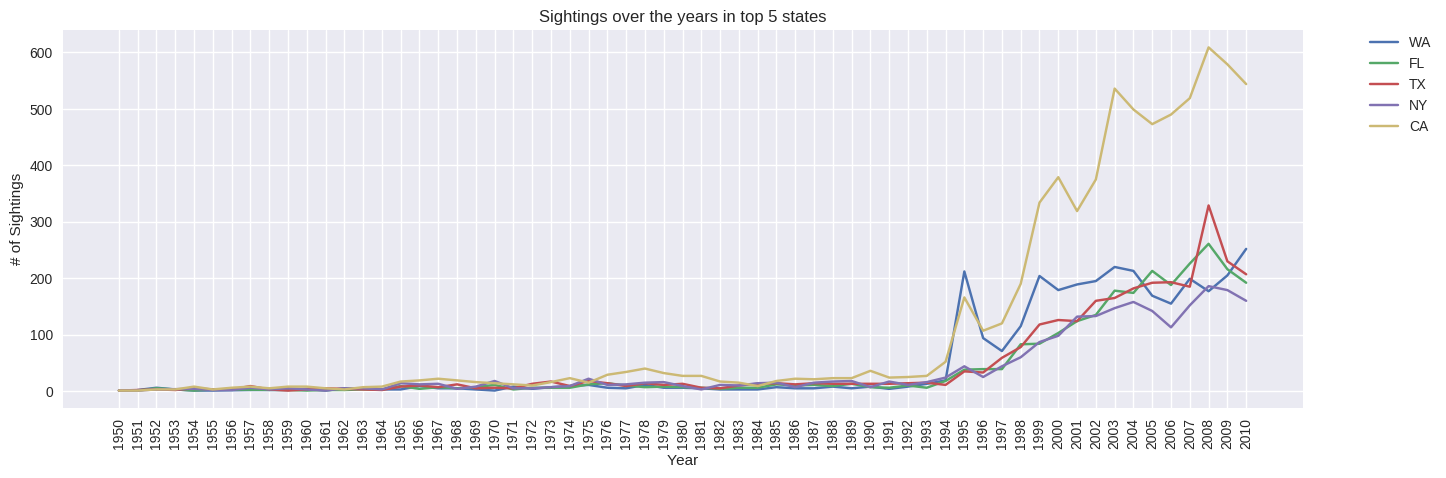

In [30]:
us_df = us_df[us_df.year <= 2010]

# Arizona sightings per year
ca_df = us_df[us_df.state == 'ca']
ca_df = ca_df.groupby('year').size().reset_index(name="count")

# Washington sightings per year
wa_df = us_df[us_df.state == 'wa']
wa_df = wa_df.groupby('year').size().reset_index(name="count")

# Florida sightings per year
fl_df = us_df[us_df.state == 'fl']
fl_df = fl_df.groupby('year').size().reset_index(name="count")

# Texas sightings per year
tx_df = us_df[us_df.state == 'tx']
tx_df = tx_df.groupby('year').size().reset_index(name="count")

# New York sightings per year
ny_df = us_df[us_df.state == 'ny']
ny_df = ny_df.groupby('year').size().reset_index(name="count")

years = []
for i in range(1, 62):
    years.append(1949 + i)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(wa_df['year'], wa_df['count'], label="WA")
plt.plot(fl_df['year'], fl_df['count'], label="FL")
plt.plot(tx_df['year'], tx_df['count'], label="TX")
plt.plot(ny_df['year'], ny_df['count'], label="NY")
plt.plot(ca_df['year'], ca_df['count'], label="CA")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('# of Sightings')
plt.xlabel('Year')
plt.title('Sightings over the years in top 5 states')

plt.xticks(years,rotation='vertical')

plt.show()

From this graph, it is clear that any time after 1996, California is the best state to go to, to spot a UFO.  We will explore the time period before 1996 later on in this tutorial using machine learning.  <br>
<br>
### What does a UFO look like?
We will need to know what exactly we are looking for in the sky when we get to California.  To understand what an alien ship will likely look like we will make a bar graph of the total sightings of each shape from 1990-2010.

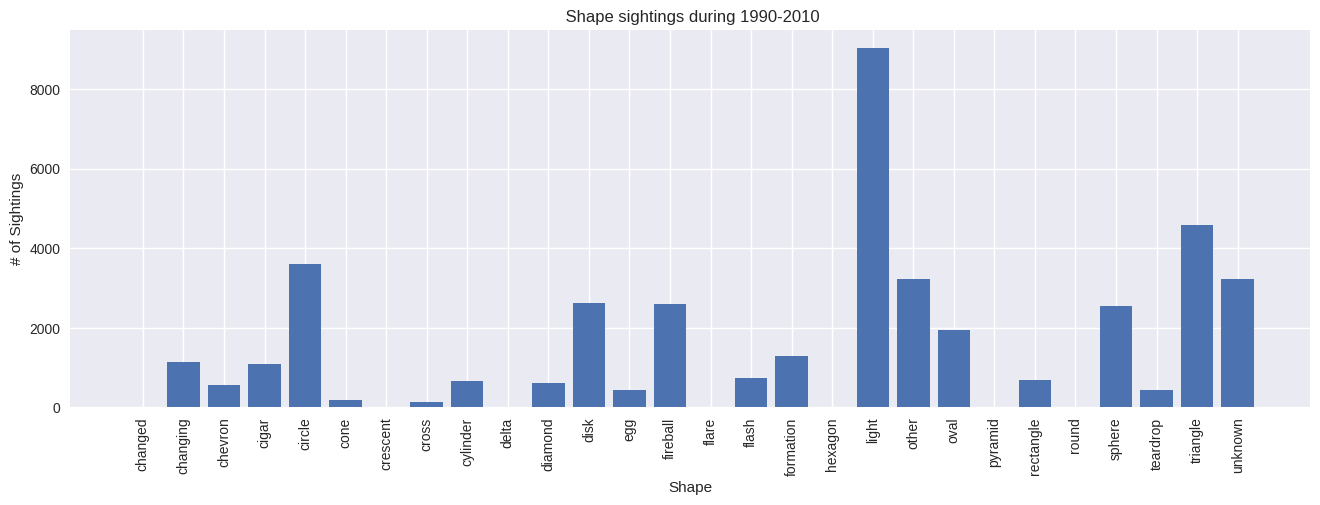

In [31]:
# Shape Occurences from 1990-2010

shape_df = us_df[us_df.year >= 1990]

shape_df = shape_df.groupby('shapes').size().reset_index(name="count")

x_axis = []
for x in range (0, 28):
    x_axis.append(x)
    
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.bar(x_axis, shape_df['count'])
plt.ylabel('# of Sightings')
plt.xlabel('Shape')
plt.title(' Shape sightings during 1990-2010')
plt.xticks(x_axis, shape_df['shapes'],rotation='vertical')
plt.show()



It seems like we are likely to see a light shaped UFO in this time period.  However, since there was such a large standard deviation in number of sightings during this time period, lets explore the most popular shapes in our top 5 states.  We will graph the total sightings of the top three shapes, light, circle and triangle in each state on separate bar graphs from 1990-2010.

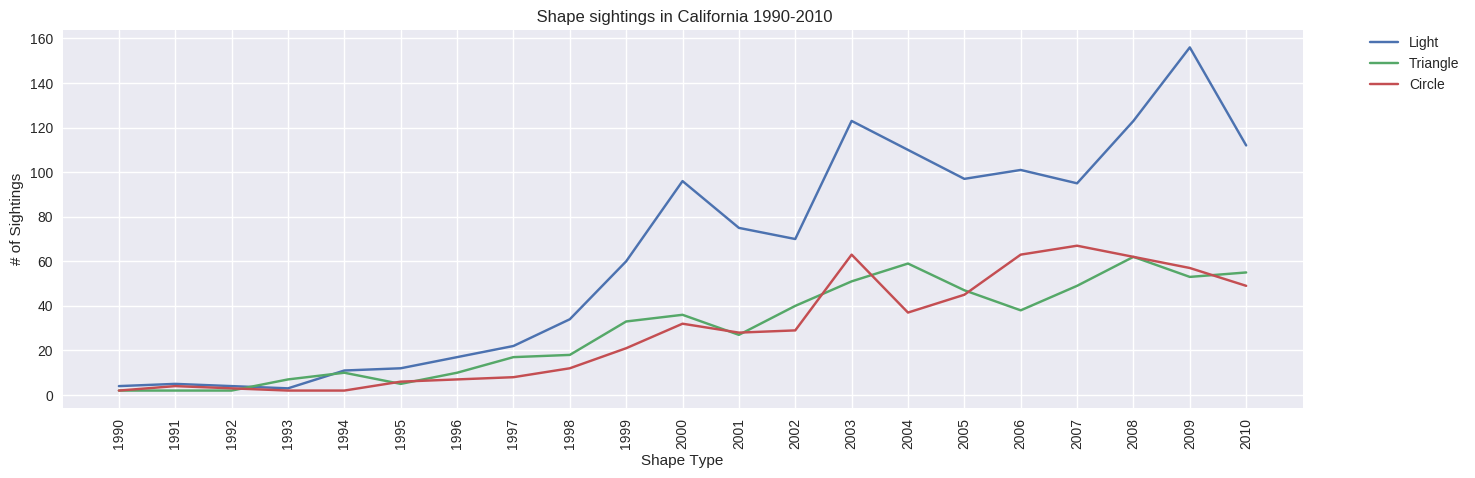

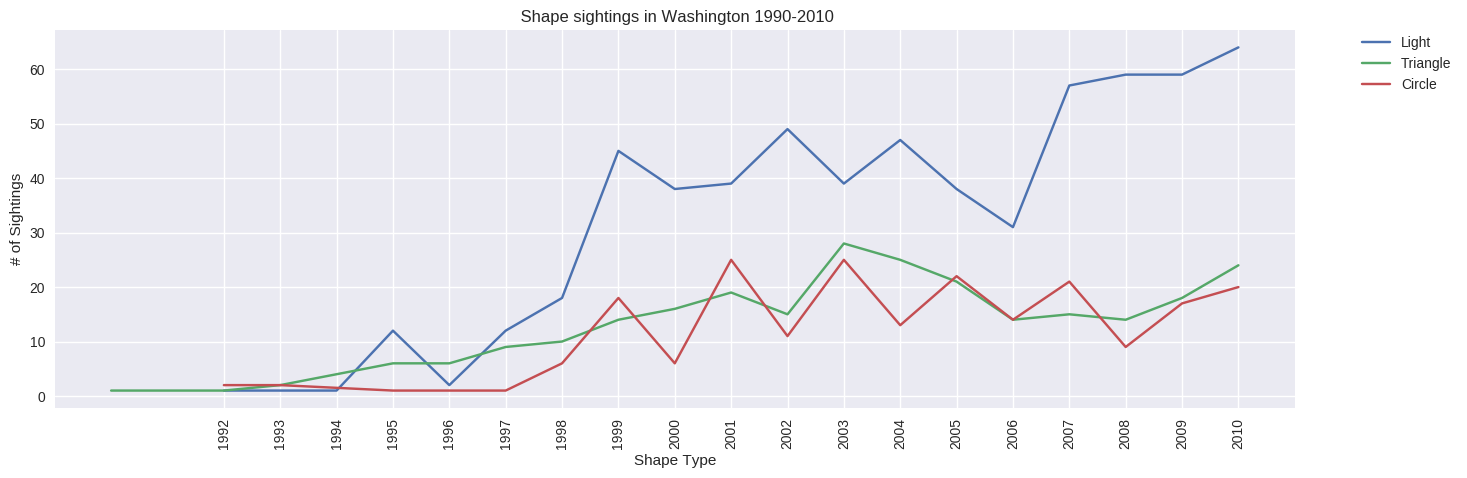

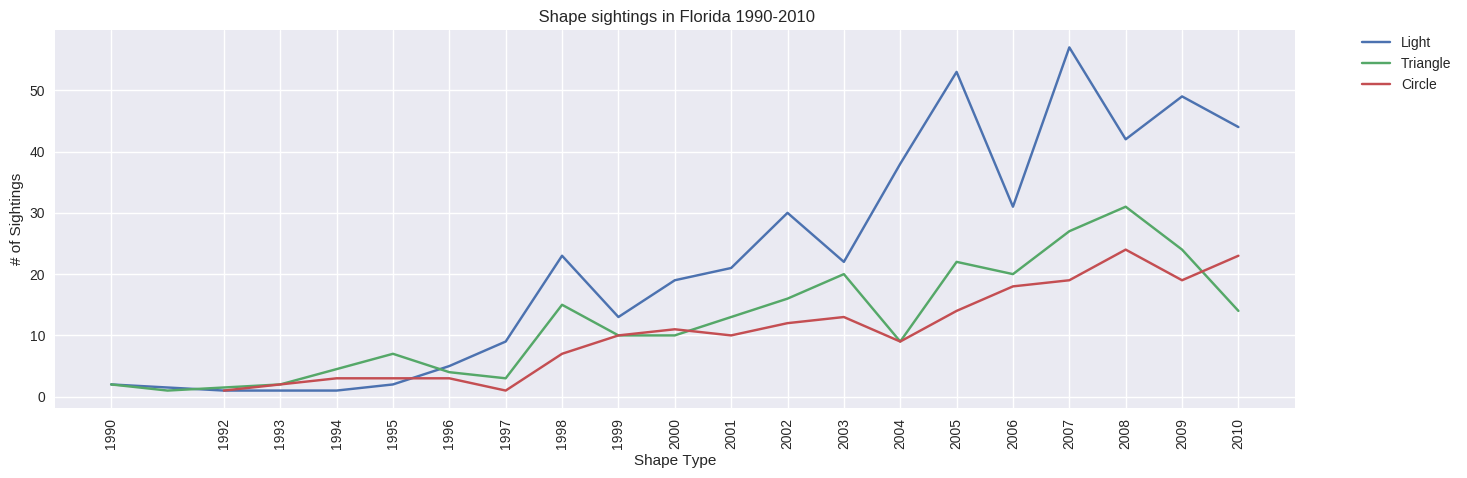

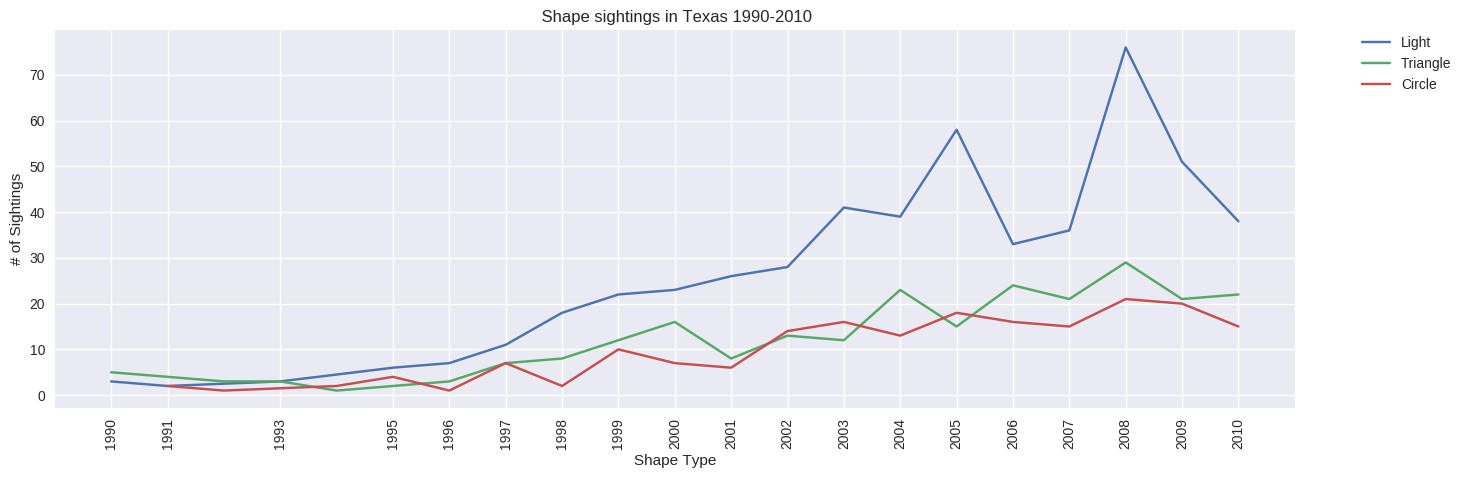

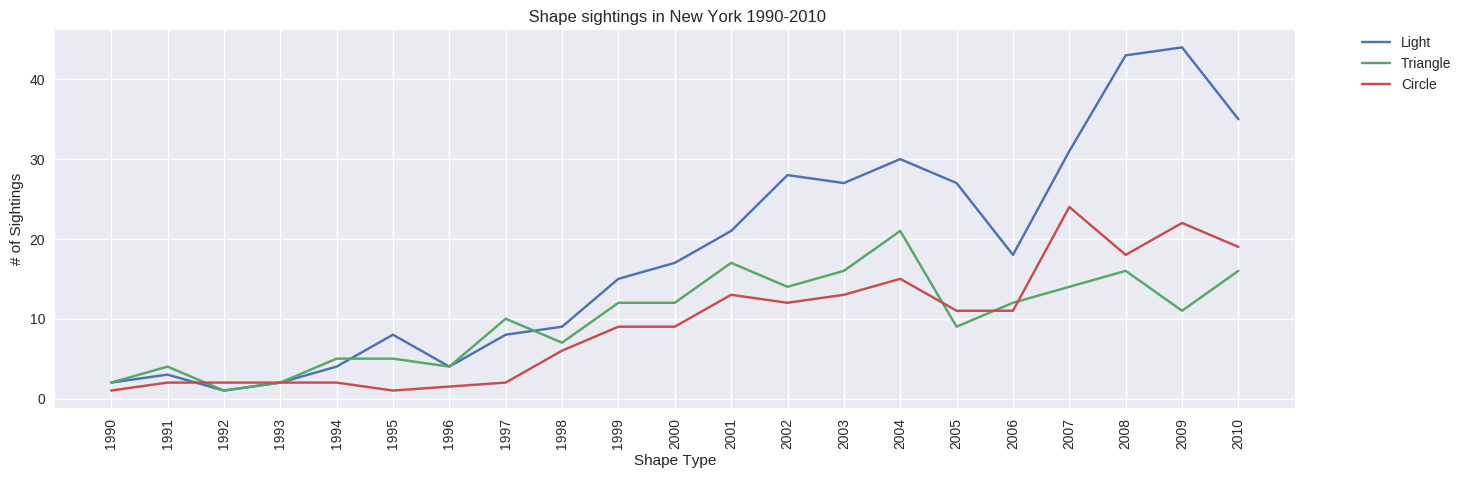

In [23]:
# Arizona Shape Sightings from 1990 - 2010
ca_df = us_df[us_df.state == 'ca']
ca_df = ca_df[ca_df.year >= 1990]

ca_df = ca_df.groupby(['shapes', 'year']).size().reset_index(name="count")

ca_df_light = ca_df[ca_df.shapes == 'light']
ca_df_triangle = ca_df[ca_df.shapes == 'triangle']
ca_df_circle = ca_df[ca_df.shapes == 'circle']

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(ca_df_light['year'], ca_df_light['count'], label="Light")
plt.plot(ca_df_triangle['year'], ca_df_triangle['count'], label="Triangle")
plt.plot(ca_df_circle['year'], ca_df_circle['count'], label="Circle")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(ca_df_light['year'],rotation='vertical')
plt.ylabel('# of Sightings')
plt.xlabel('Shape Type')
plt.title(' Shape sightings in California 1990-2010')

plt.show()

# Washington Shape Sightings from 1990 - 2010
wa_df = us_df[us_df.state == 'wa']
wa_df = wa_df[wa_df.year >= 1990]

wa_df = wa_df.groupby(['shapes', 'year']).size().reset_index(name="count")

wa_df_light = wa_df[wa_df.shapes == 'light']
wa_df_triangle = wa_df[wa_df.shapes == 'triangle']
wa_df_circle = wa_df[wa_df.shapes == 'circle']

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(wa_df_light['year'], wa_df_light['count'], label="Light")
plt.plot(wa_df_triangle['year'], wa_df_triangle['count'], label="Triangle")
plt.plot(wa_df_circle['year'], wa_df_circle['count'], label="Circle")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(wa_df_light['year'],rotation='vertical')
plt.ylabel('# of Sightings')
plt.xlabel('Shape Type')
plt.title(' Shape sightings in Washington 1990-2010')

plt.show()

# Florida Shape Sightings from 1990 - 2010
fl_df = us_df[us_df.state == 'fl']
fl_df = fl_df[fl_df.year >= 1990]

fl_df = fl_df.groupby(['shapes', 'year']).size().reset_index(name="count")

fl_df_light = fl_df[fl_df.shapes == 'light']
fl_df_triangle = fl_df[fl_df.shapes == 'triangle']
fl_df_circle = fl_df[fl_df.shapes == 'circle']

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(fl_df_light['year'], fl_df_light['count'], label="Light")
plt.plot(fl_df_triangle['year'], fl_df_triangle['count'], label="Triangle")
plt.plot(fl_df_circle['year'], fl_df_circle['count'], label="Circle")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(fl_df_light['year'],rotation='vertical')
plt.ylabel('# of Sightings')
plt.xlabel('Shape Type')
plt.title(' Shape sightings in Florida 1990-2010')

plt.show()

# Texas Shape Sightings from 1990 - 2010
tx_df = us_df[us_df.state == 'tx']
tx_df = tx_df[tx_df.year >= 1990]

tx_df = tx_df.groupby(['shapes', 'year']).size().reset_index(name="count")

tx_df_light = tx_df[tx_df.shapes == 'light']
tx_df_triangle = tx_df[tx_df.shapes == 'triangle']
tx_df_circle = tx_df[tx_df.shapes == 'circle']

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(tx_df_light['year'], tx_df_light['count'], label="Light")
plt.plot(tx_df_triangle['year'], tx_df_triangle['count'], label="Triangle")
plt.plot(tx_df_circle['year'], tx_df_circle['count'], label="Circle")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(tx_df_light['year'],rotation='vertical')
plt.ylabel('# of Sightings')
plt.xlabel('Shape Type')
plt.title(' Shape sightings in Texas 1990-2010')

plt.show()

# New York Shape Sightings from 1990 - 2010
ny_df = us_df[us_df.state == 'ny']
ny_df = ny_df[ny_df.year >= 1990]

ny_df = ny_df.groupby(['shapes', 'year']).size().reset_index(name="count")

ny_df_light = ny_df[ny_df.shapes == 'light']
ny_df_triangle = ny_df[ny_df.shapes == 'triangle']
ny_df_circle = ny_df[ny_df.shapes == 'circle']

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(ny_df_light['year'], ny_df_light['count'], label="Light")
plt.plot(ny_df_triangle['year'], ny_df_triangle['count'], label="Triangle")
plt.plot(ny_df_circle['year'], ny_df_circle['count'], label="Circle")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(ny_df_light['year'],rotation='vertical')
plt.ylabel('# of Sightings')
plt.xlabel('Shape Type')
plt.title(' Shape sightings in New York 1990-2010')

plt.show()


For the most part on all these graphs light shaped UFO's appear to be the most popular.  It seems like if we are looking for a UFO we should go to California look for lights in the sky.<br>
#### The 1993 Spike...? 
Every time we have analyzed UFO data over time, the numbers apear to spark around the year 1993. What happened in '93? Did the aliens finally reach us? Did air planes become more common? Did we become more paranoid as a society? 
<br><br>
Blaming the growth of the commercial airline industry seems like the obvious solution.  However, after some research we discovered another possible contributing factor.  Our society may have become more aware and concerned about extra-terestrials in general.  In 1993 a TV series called the X-files was released which featured detectives investigating paranormal activity.  As the show quickly gained popularity, it seems like the number of UFO sightings increased.  While we have no concrete evidence or data to confirm this trend due to lack of information regarding the X-files popularity and ratings.  We did notice that many of the UFO's featured in the X-files were simply just circluar lights in the sky, sometimes in triangle shaped patterns.  It may just be a coincidence that these are the top three shapes in our analysis but if more data on the X-files becomes available, this relationship is worth exploring.
<br>
### Machine Learning 

Machine Learning is extremely useful for predicting data based on data that we already have. There are two things we want to predict. 

1. Predicting what state will be the best to see a sighting based on year.
2. Predicting what year will be the best to be in for a given state.

We are going to do both of these by using a training set of 15,000 sightings.
For the actual Machine Learning algorithm, we're going to use the decision tree classifer. 

Essentially, its a tree structure that breaks the dataset into smaller sets, which allows us to create an informed prediction based on the data. More reading can be done on it here. https://en.wikipedia.org/wiki/Decision_tree_learning

#### Categorical Variables

An issue that is going to come up is trying to use the states as variables. Machine Learning isn't created to take strings as variables, because there is no natural qualitative factor to them. In order to change the state names (categorical variables) into numbers (qualitative variables), we are going to use a Label Encoder that sklearn provides us. We convert the state columns to numbers, and then convert back for the results.


In [68]:
# Predicting State to go to by Year
ml_df = us_df2[us_df2.year >= 1990]
ml_df = ml_df[ml_df.year < 2010]

# Randomize order of our dataframe 
ml_df = ml_df.sample(frac=1).reset_index(drop=True)

# Label Encoder
states = state_spike['state']
le = preprocessing.LabelEncoder()
le.fit(states)
list(le.classes_)

# Training Set
train = ml_df[:15000]
X_train = train['year']
y_train = le.transform(train['state'])

# Testing Set
test = ml_df[15000:15100]
X_test = test['year']
y_test = le.transform(test['state'])

# Train the model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[:, None], y_train)

# Creating Array of Years to Predict States for
years = []
state = []
for i in range(0, 31):
    x = 1990 + i
    years.append(x)
    state.append(le.inverse_transform(clf.predict(x)))
    
years_vs_state = pd.DataFrame({'Years' : years, 'State' : state})
years_vs_state = years_vs_state[['Years', 'State']]
years_vs_state.head()

,Years,State
0,1990,[ca]
1,1991,[mi]
2,1992,[ca]
3,1993,[az]
4,1994,[ca]


We created years from 1990-2010, and put that into the decision tree classifier in order to see what states were the best to go to in that year. The results are seen above. The algorithm could even be used to attempt to predicit future years above 2010, although it may not be very accurate.

In [67]:
# Predicting Year to go to by State
from sklearn import svm

# Training Set
train = ml_df[:15000]
X_train = le.transform(train['state'])
y_train = train['year']

# Testing Set
test = ml_df[15000:15100]
X_test = le.transform(test['state'])
y_test = test['year']

# Train the model
clf = tree.DecisionTreeClassifier() 
clf = clf.fit(X_train[:, None], y_train)

# Gathering Staes to predicts years for
states_coded = le.transform(states)
years = []
for i in range(0, 52):
    years.append(clf.predict(states_coded[i]))


state_vs_years = pd.DataFrame({'Years' : years, 'State' : states})
state_vs_years.head()


,State,Years
0,ak,[2005]
1,al,[2007]
2,ar,[1999]
3,az,[2000]
4,ca,[2008]


Here, we created a list of states and and ran it through the decision tree classifier to see the best year for each state. We see that for California, it was 2008. That makes sense because 2008 was a peak for Californian UFO sightings. 

### Mapping it all out 

Since we have concluded that the best time and place to spot a UFO is in California 2009, lets take a look at all the sightings in the state. To do this we will mark all the different sightings in California in the year 2009 on a folium map.

In [46]:
#creating a folium map for sightings 
map_osm = folium.Map(location=[34.0522, -118.2437], zoom_start=5)

#getting all sightings in 2009 from california
ca_df = us_df[us_df.year == 2009]
ca_df = ca_df[ca_df.state == "ca"]

#creating a marker with information on each sighting
for index, row in ca_df.iterrows():
    lat = float(ca_df.loc[index, "latitude"])
    long = float(ca_df.loc[index, "longitude"])
    comments = ca_df.loc[index, "comments"]
    shapes = ca_df.loc[index, "shapes"]
    city = ca_df.loc[index, "city"]
    duration = ca_df.loc[index, "duration (hours/min)"]
    
    if shapes == "light":
        color = "red"
    elif shapes == "circle":
        color = "green"
    elif shapes == "triangle":
        color = "purple"
    else:
        color = "blue"
    pop= str("City: " + str(city)
               + "<br>" + "Shape: " + str(shapes)\
             + "<br>" + "Duration: " + str(duration) \
             + "<br>" + "Description: " + str(comments))
    folium.Marker(location=[lat, long], popup = pop, icon=folium.Icon(color=color )).add_to(map_osm)
map_osm